In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
data = pd.read_csv("house-prices.csv")

In [14]:
X = data[['SqFt',]]
y = data['Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [16]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [17]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [18]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test_poly)

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 476970808.15256256
R2 Score: 0.3543887404827526


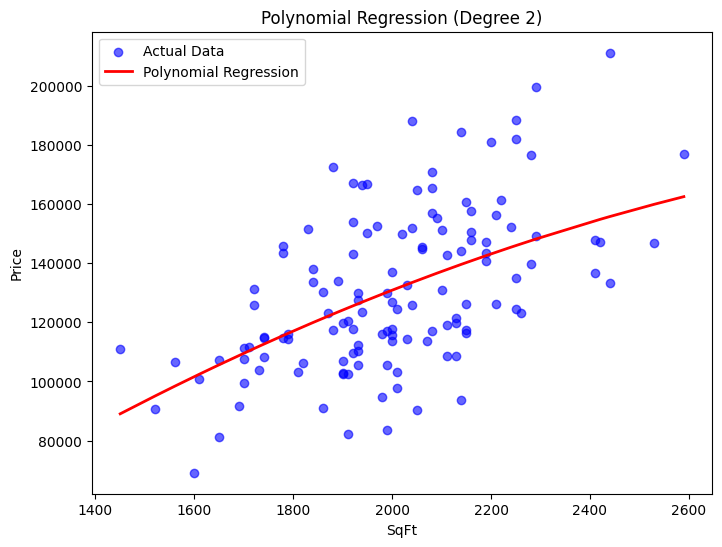

In [21]:
X_sorted = np.sort(X.values, axis=0)
X_sorted_df = pd.DataFrame(X_sorted, columns=['SqFt'])  
X_sorted_poly = poly.transform(X_sorted_df)

y_pred_curve = model.predict(X_sorted_poly)

plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
plt.plot(X_sorted, y_pred_curve, color='red', linewidth=2, label='Polynomial Regression')
plt.xlabel("SqFt")
plt.ylabel("Price")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()
